# Titel: Logistic Regression Useing Titanic Dataset

## The Logistic Regression Equation

The logistic regression equation is represented as:

P(Y=1) = 1 / (1 + e^-(β0 + β1X1 + β2X2 + ... + βnXn)),

where P(Y=1) is the probability of the outcome variable being 1, e is the base of the natural logarithm, β0 is the intercept, and β1 to βn are the coefficients for the independent variables X1 to Xn, respectively.

## The Sigmoid Function

# The sigmoid function, represented as:

1 / (1 + e^- (β0 + β1*X1 + β2*X2 + ... + βn*Xn)), is used in logistic regression to transform the linear combination of the independent variables into a probability. This sigmoid function ensures that the probability values predicted by the logistic regression equation always fall between 0 and 1. 

By adjusting the coefficients (β values) of the independent variables, logistic regression can estimate the impact of each variable on the probability of the outcome variable being 1.

In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Titanic dataset from seaborn
titanic_data = sns.load_dataset('titanic')
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
titanic_data.shape

(891, 15)

In [4]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
#missing value Delete
titanic_data.drop('deck',axis=1,inplace=True)
titanic_data.dropna(inplace=True)

In [8]:
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [9]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [11]:
# Encode labels in column 'sex' to convert Male as 0 and Female as 1.
titanic_data['sex']= label_encoder.fit_transform(titanic_data['sex'])
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [12]:
# Select features and target variable
X = titanic_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = titanic_data['survived']

In [13]:
# Split the dataset into training and test sets (e.g., 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Initialize and train the logistic regression model
logistic_reg = LogisticRegression()

In [15]:
#Model fit
logistic_reg.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Make predictions on the test set
predictions = logistic_reg.predict(X_test)

In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7902097902097902


In [18]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.65      0.73        63

    accuracy                           0.79       143
   macro avg       0.80      0.78      0.78       143
weighted avg       0.80      0.79      0.79       143



In [19]:
# Compute ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, logistic_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

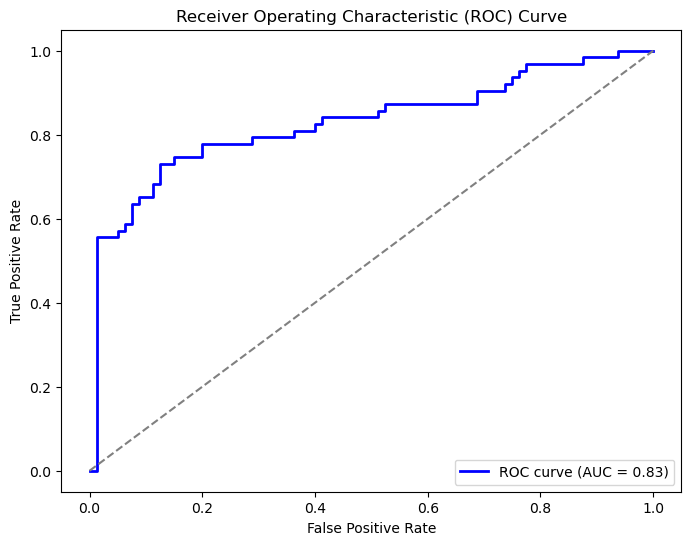

In [20]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Accuracy
Our accuracy score is 0.79 (or 79.02%), which means that the model correctly predicted approximately 79% of the instances in the test dataset.

## Summary of classification report
This classification report evaluates a model's performance in predicting survival outcomes (survived or not) based on various passenger attributes.
For passengers who did not survive (class 0): The precision is 77%. When the model predicts a passenger didn't survive, it is accurate 77% of the time.
For passengers who survived (class 1): The precision is 84%. When the model predicts a passenger survived, it is accurate 84% of the time.

## Recall
For passengers who did not survive (class 0): The recall is 90%. The model correctly identifies 90% of all actual non-survivors.
For passengers who survived (class 1): The recall is 65%. The model captures 65% of all actual survivors.

## F1-score
For passengers who did not survive (class 0): The F1-score is 83%.
For passengers who survived (class 1): The F1-score is 73%.
There were 80 instances of passengers who did not survive and 63 instances of passengers who survived in the dataset.


## ROC Curve (Receiver Operating Characteristic)
The ROC curve shows the trade-off between sensitivity (recall) and specificity (1 - FPR) at various thresholds. A curve closer to the top-left corner represents better performance.
## AUC (Area Under the Curve)
Definition: AUC represents the area under the ROC curve. It quantifies the model's ability to distinguish between the positive and negative classes.
A higher AUC value (closer to 1.0) indicates better discrimination; the model has better predictive performance.

In [22]:
coefficients = logistic_reg.coef_[0]

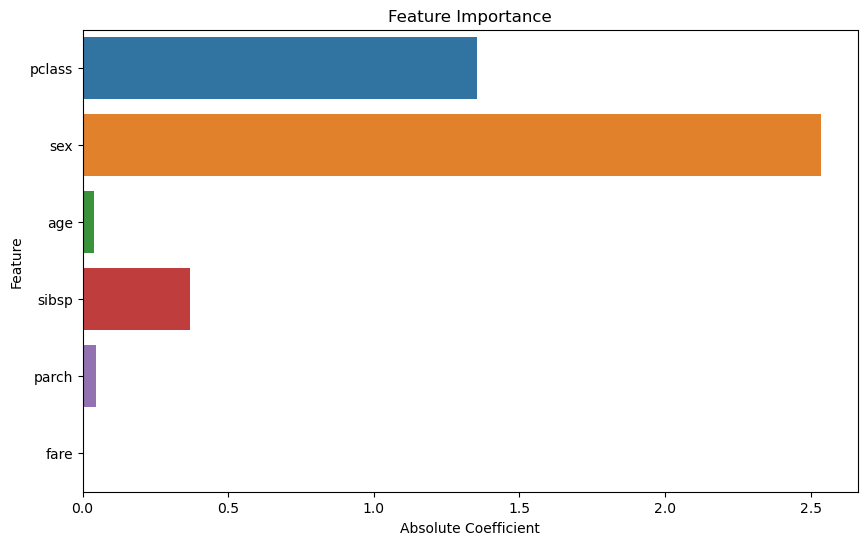

In [23]:
#Feature Importance Plot
# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=np.abs(coefficients), y=X.columns)
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [24]:
cm = confusion_matrix(y_test, predictions)

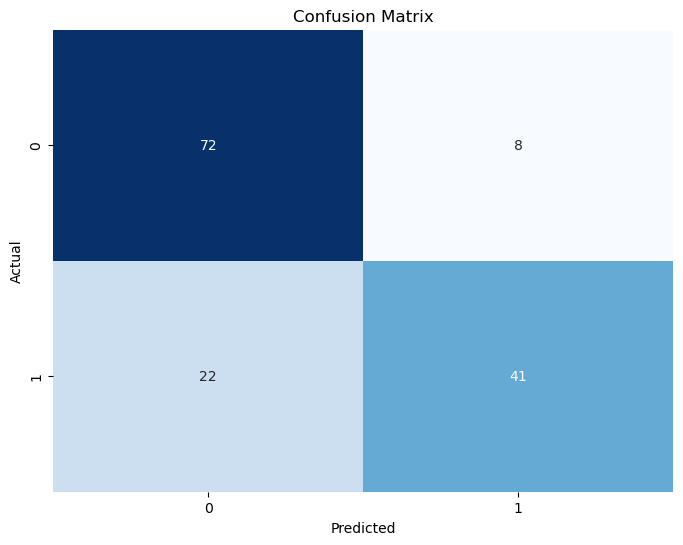

In [25]:
# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix you provided offers a breakdown of the performance of a logistic regression model on the Titanic dataset. Here's how to interpret the results:

### Confusion Matrix Breakdown:

- **True Negatives (Top-left, 72):** 
  - **72 instances** were correctly predicted as **not survived** (actual 0, predicted 0).
  
- **False Positives (Top-right, 8):** 
  - **8 instances** were incorrectly predicted as **survived** when they were actually **not survived** (actual 0, predicted 1).
  
- **False Negatives (Bottom-left, 22):** 
  - **22 instances** were incorrectly predicted as **not survived** when they were actually **survived** (actual 1, predicted 0).
  
- **True Positives (Bottom-right, 41):** 
  - **41 instances** were correctly predicted as **survived** (actual 1, predicted 1).

### Key Metrics from the Confusion Matrix:

1. **Accuracy**: The proportion of total correct predictions (both true positives and true negatives) out of all predictions.
   \[
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{41 + 72}{41 + 72 + 8 + 22} \approx 0.79
   \]

2. **Precision (Positive Predictive Value)**: The proportion of true positive predictions out of all predicted positives.
   \[
   \text{Precision} = \frac{TP}{TP + FP} = \frac{41}{41 + 8} \approx 0.84
   \]

3. **Recall (Sensitivity or True Positive Rate)**: The proportion of true positives out of all actual positives.
   \[
   \text{Recall} = \frac{TP}{TP + FN} = \frac{41}{41 + 22} \approx 0.65
   \]

4. **F1-Score**: The harmonic mean of precision and recall, providing a balance between the two.
   \[
   \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} \approx 0.73
   \]

### Summary:
- **Strengths**: The model has a good number of correct predictions, with an accuracy of about 79%. Precision is high, meaning when it predicts survival, it's likely correct.
- **Weaknesses**: The recall is lower, indicating that the model misses some true positives (actual survivors). The number of false negatives (22) is higher than the false positives (8), meaning the model is more likely to miss predicting actual survivors than incorrectly predicting someone would survive.

Improving recall could be a focus if missing survivors is a critical error in your analysis. This could involve adjusting the decision threshold or exploring other models.

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


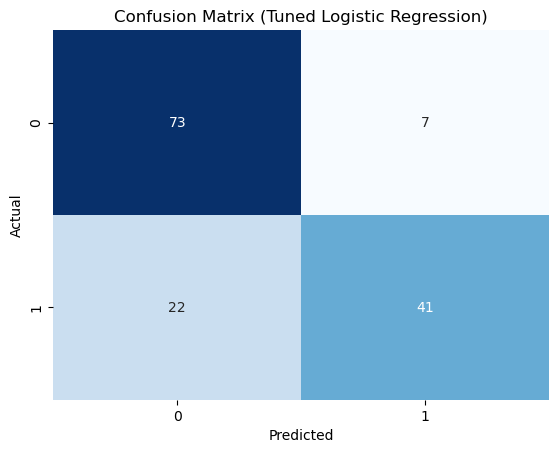

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Example of hyperparameter tuning with regularization
param_grid = {'C': [0.01, 0.1, 1, 10, 100,200,300], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

# Best parameters and model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# Predictions and confusion matrix for the best model
y_pred_best = best_model.predict(X_test)
cm_best = confusion_matrix(y_test, y_pred_best)

# Plotting
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Logistic Regression)')
plt.show()


In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print("Accuracy:", accuracy)

Accuracy: 0.7972027972027972


Develop by: <br>
Md. Sairul Islam <br>
Linkdin: https://www.linkedin.com/in/sairulislam/ <br>
Facebook: https://web.facebook.com/sahirul.islam.9<br>
Github: https://github.com/sahirul70<br>
Portfolio: https://sahirul70.github.io/sairul/